<a href="https://colab.research.google.com/github/Lorex-xus/DGETI-Pedagogia-2026/blob/main/Sesi%C3%B3n%201%20-%20DGETI%20-%20Pedagog%C3%ADa%202026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sesión 1**


## **Clase itroductoria**: Inteligencia Aritifcial

### ¿Qué es?

* Un sistema que intenta simular el funcionamiento de la mente humana
  * Con información
  * Con desiciones
  * Con procesamiento

### Tipos

* #### Machine Learning (ML)
  * Aprendizaje
    * Supervisado
    * No supervisado
  * Predicción
  * Clasificación
  * Agrupación
* #### Deep Learning (DeepL)
  * Aprendizaje
    * Supervisado

## **Práctica**

### **Paso 1**: Creando nuestros 'datos de ejemplo'

Para entender cómo funciona la clasificación, vamos a crear un conjunto de datos muy simple. Imagina que tenemos dos tipos de flores, representadas por dos características (por ejemplo, el largo y el ancho de sus pétalos). Queremos que una IA aprenda a distinguirlas.

Usaremos la librería `scikit-learn` para generar estos datos de manera artificial. Cada punto tendrá dos valores (X e Y) y pertenecerá a una de dos clases (0 o 1).

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generamos 100 puntos de datos con 2 características y 2 clases
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=3)

# 'X' son nuestras características (por ejemplo, largo y ancho de pétalo)
# 'y' son las etiquetas de las clases (0 o 1)

print(f"Dimensiones de X (características): {X.shape}")
print(f"Dimensiones de y (etiquetas de clase): {y.shape}")
print("Primeros 5 puntos de X:\n", X[:5])
print("Primeras 5 etiquetas de y:\n", y[:5])

Dimensiones de X (características): (100, 2)
Dimensiones de y (etiquetas de clase): (100,)
Primeros 5 puntos de X:
 [[-3.94672034  8.4573092 ]
 [ 7.88903257  5.13457584]
 [-4.1423458   9.3470539 ]
 [ 7.10605932  7.66354863]
 [ 5.32225864  5.89459795]]
Primeras 5 etiquetas de y:
 [0 1 0 1 1]


### **Paso 2**: Visualizando nuestros datos

Ahora, veamos cómo se ven estos datos. Los graficaremos en un plano 2D, donde cada eje representa una de nuestras características, y el color de cada punto indicará a qué clase pertenece.

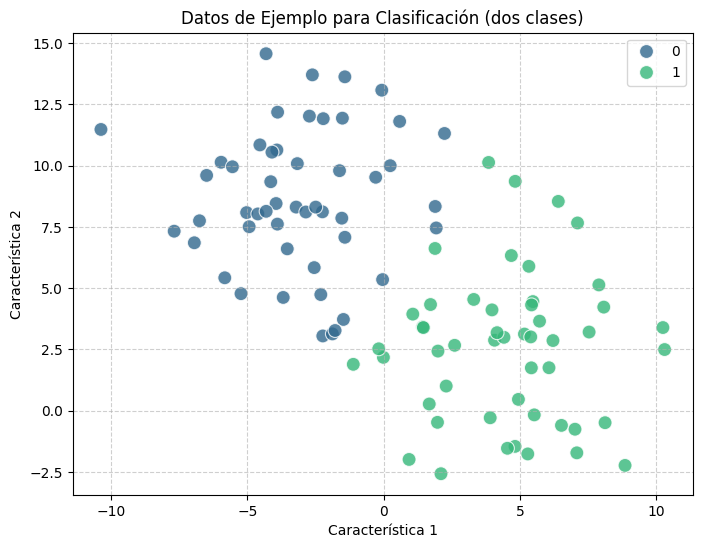

In [2]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100, alpha=0.8)
plt.title('Datos de Ejemplo para Clasificación (dos clases)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### **Paso 3**: Entrenando un modelo de Clasificación simple

Nuestro objetivo es que la IA aprenda a dibujar una línea (o una curva, en casos más complejos) que separe estas dos clases de puntos. Para este ejemplo, usaremos un modelo llamado 'Regresión Logística', que es como una navaja suiza para problemas de clasificación binaria (dos clases) y es fácil de entender.

El modelo buscará la mejor 'línea divisoria' que minimice los errores al clasificar los puntos.

In [3]:
from sklearn.linear_model import LogisticRegression

# Creamos una instancia de nuestro modelo de clasificación
model = LogisticRegression(random_state=42)
# Random State es una semilla de generación

# Entrenamos el modelo con nuestros datos (X) y sus etiquetas (y)
model.fit(X, y)

print("¡Modelo de clasificación entrenado con éxito!")

¡Modelo de clasificación entrenado con éxito!


### **Paso 4**: Visualizando la clasificación del modelo

Ahora que nuestro modelo ha "aprendido", podemos ver cómo ha decidido separar las dos clases. La Regresión Logística, al ser un modelo lineal, dibujará una línea recta en nuestro gráfico 2D. Todo lo que caiga a un lado de la línea se clasificará como una clase, y todo lo que caiga al otro lado, como la otra.

También evaluaremos qué tan bien lo hizo, calculando su 'precisión' (accuracy), que nos dice el porcentaje de puntos que clasificó correctamente.

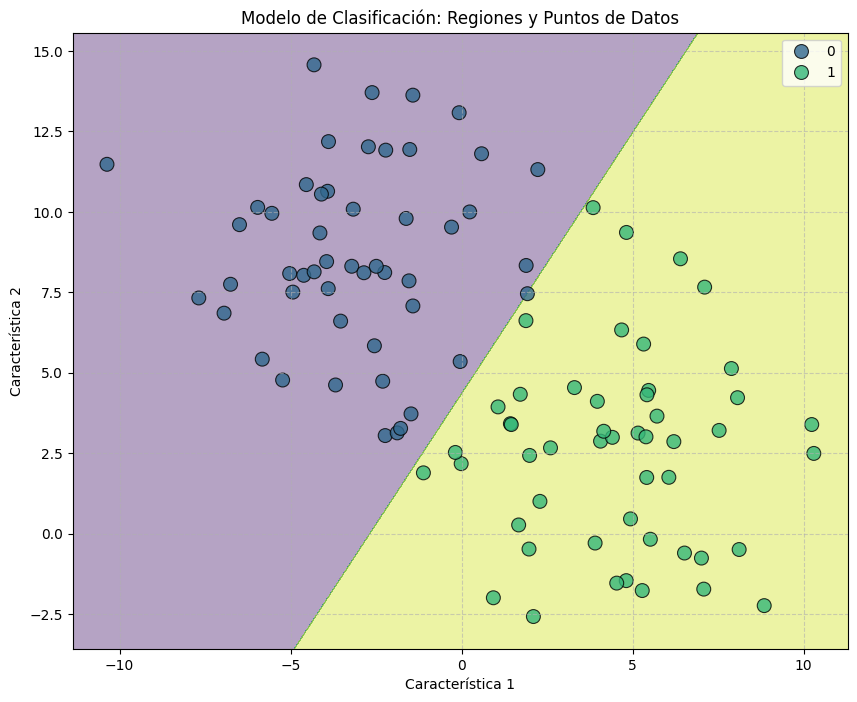


La precisión de nuestro modelo en los datos de entrenamiento es: 0.99
Esto significa que el modelo clasificó correctamente el 99% de los puntos.


In [4]:
from sklearn.metrics import accuracy_score

# Calculamos los límites del gráfico para dibujar la línea de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecimos la clase para cada punto en la 'malla' para pintar el fondo
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

# Pintamos el fondo con las regiones de decisión del modelo
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Graficamos nuestros puntos de datos originales
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100, alpha=0.8, edgecolor='k')

plt.title('Modelo de Clasificación: Regiones y Puntos de Datos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Hacemos predicciones con el modelo para nuestros datos de entrenamiento
y_pred = model.predict(X)

# Calculamos la precisión del modelo
accuracy = accuracy_score(y, y_pred)
print(f"\nLa precisión de nuestro modelo en los datos de entrenamiento es: {accuracy:.2f}")
print(f"Esto significa que el modelo clasificó correctamente el {accuracy*100:.0f}% de los puntos.")

### **Recapitulando**

Hasta el momento actual podemos ver de forma práctia el proceso y pasos para:

1.  **Generado** de datos que representan dos categorías.
2.  **Visualizado** de esos datos para ver su distribución.
3.  **Entrenado** de un modelo de clasificación simple (Regresión Logística).
4.  **Visualizado** de cómo el modelo divide el espacio para clasificar nuevos puntos.
5.  **Evaluado** el rendimiento con una métrica sencilla.

Este es el concepto fundamental detrás de muchos modelos de clasificación en IA: dado un conjunto de características, el modelo aprende a asignar una etiqueta o categoría a nuevos datos basándose en patrones que ha encontrado.